In [1]:
import numpy as np
import os
import copy
import matplotlib
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

from desc.io import load
from desc.plotting import (
    plot_1d,
    plot_2d,
    plot_3d,
    plot_section,
    plot_surfaces,
    plot_comparison,
)
from desc.plotting import colorblind_colors

%matplotlib inline
os.getcwd()

DESC version 0.4.12+12.g9f1427c.dirty, using JAX backend, jax version=0.2.10, jaxlib version=0.1.62, dtype=float64
Using device: CPU, with 21.23 GB available memory


'/home/fouriest/SCHOOL/Princeton/PPPL/DESC/paper_images'

# DSHAPE

In [3]:
deqf0 = load("DSHAPE_0_output.h5")
deqf1 = load("DSHAPE_1_output.h5")
deqf2 = load("DSHAPE_2_output.h5")
deqf3 = load("DSHAPE_3_output.h5")

deq0 = deqf0[-1].initial
deq1 = deqf1[-1].initial
deq2 = deqf2[-1].initial
deq3 = deqf3[-1].initial

obj = deq0.objective
obj.build()

args = (deq0.Rb_lmn, deq0.Zb_lmn, deq0.p_l, deq0.i_l, deq0.Psi)

Precomputing transforms


In [4]:
obj.callback(deq0.x, *args)
obj.callback(deq1.x, *args)
obj.callback(deq2.x, *args)
obj.callback(deq3.x, *args)

print("")
print(obj.compute_scalar(deq0.x, *args))
print(obj.compute_scalar(deq1.x, *args))
print(obj.compute_scalar(deq2.x, *args))
print(obj.compute_scalar(deq3.x, *args))

Total residual:  1.611e+08  f_rho:  1.795e+04  f_beta:  1.513e+00
Total residual:  1.243e+08  f_rho:  1.452e+04  f_beta:  6.142e+03
Total residual:  2.778e+07  f_rho:  7.360e+03  f_beta:  1.183e+03
Total residual:  9.271e+05  f_rho:  1.323e+03  f_beta:  3.208e+02

161132843.3459915
124289361.1121573
27781969.715977892
927101.2477697588


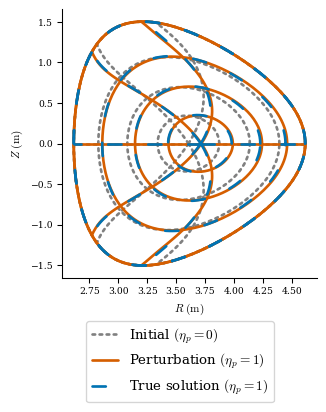

In [30]:
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=96)
fig, ax = plot_comparison(
    [deq0, deq1, deqf0[-1]],
    rho=4,
    theta=6,
    colors=["grey", colorblind_colors[1], colorblind_colors[0]],
    ax=ax,
    labels=[
        "Initial $(\\eta_p=0)$",
        "Perturbation $(\\eta_p=1)$",
        "True solution $(\\eta_p=1)$",
    ],
    lws=[2, 2, 2],
    linestyles=[":", "-", (0, (5, 10))],
    alphas=[1, 1, 1],
    legend=False,
)
ax[0].set_title("")
fig.legend(loc="upper center", bbox_to_anchor=(0.55, 0.05))
fig.savefig("dshape.png", bbox_inches="tight")
fig.savefig("dshape.pdf", bbox_inches="tight")

# HELIOTRON $\beta$

In [9]:
heqf = EquilibriaFamily.load("HELIOTRON_scan_output.h5")

In [10]:
[heq.pressure([0, 0.5, 1]) for heq in heqf]

[DeviceArray([0., 0., 0.], dtype=float64),
 DeviceArray([0., 0., 0.], dtype=float64),
 DeviceArray([1800. , 1012.5,    0. ], dtype=float64),
 DeviceArray([3600., 2025.,    0.], dtype=float64),
 DeviceArray([5400. , 3037.5,    0. ], dtype=float64),
 DeviceArray([7200., 4050.,    0.], dtype=float64),
 DeviceArray([9000. , 5062.5,    0. ], dtype=float64),
 DeviceArray([10800.,  6075.,     0.], dtype=float64),
 DeviceArray([12600. ,  7087.5,     0. ], dtype=float64),
 DeviceArray([14400.,  8100.,     0.], dtype=float64),
 DeviceArray([16200. ,  9112.5,     0. ], dtype=float64),
 DeviceArray([18000., 10125.,     0.], dtype=float64)]

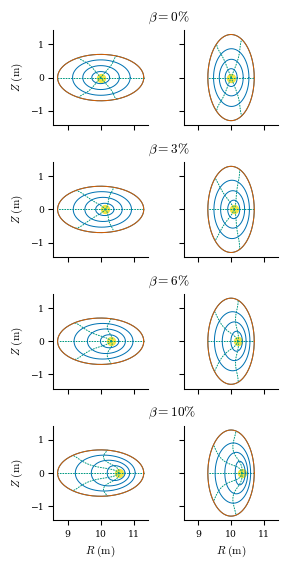

In [31]:
heqs = [
    heqf[1],
    heqf[4],
    heqf[7],
    heqf[11],
]
fig, ax = plt.subplots(
    len(heqs),
    2,
    sharex=True,
    sharey=True,
    subplot_kw=dict(aspect="equal"),
    figsize=(4, 6),
    dpi=96,
)

for i, eq in enumerate(heqs):
    plot_surfaces(eq, rho=4, theta=6, zeta=[0, np.pi], ax=ax[i])
    for line in ax[i, 0].lines:
        line.set_linewidth(0.75)
    for line in ax[i, 1].lines:
        line.set_linewidth(0.75)
    beta = eq.compute_energy()["beta"]
    fig.text(
        1,
        1.1,
        "$\\beta = {}\%$".format(int(np.around(beta * 100, 0))),
        transform=ax[i, 0].transAxes,
    )
    ax[i, 0].set_title("$\quad$")
    ax[i, 1].set_title("$\quad$")
    row = i
    ax[i, 1].set_ylabel(None)
    if row != len(heqs) - 1:
        ax[i, 0].set_xlabel(None)
        ax[i, 1].set_xlabel(None)
    ax[i, 0].tick_params(labelbottom=False, labelleft=False)
    ax[i, 1].tick_params(labelbottom=False, labelleft=False)
    if row == len(heqs) - 1:
        ax[i, 0].tick_params(labelbottom=True)
        ax[i, 1].tick_params(labelbottom=True)
    ax[i, 0].tick_params(labelleft=True)

fig.savefig("pres_scan.png", bbox_inches="tight")
fig.savefig("pres_scan.pdf", bbox_inches="tight")

# Heliotron Bdry

In [12]:
heqf0 = load("HELIOTRON_vac0_output.h5")
heqf1 = load("HELIOTRON_vac1_output.h5")
heqf2 = load("HELIOTRON_vac2_output.h5")

heq0 = heqf0[-2]
heq1 = heqf1[-1].initial
heq2 = heqf2[-1].initial
heqA = heqf2[-1]

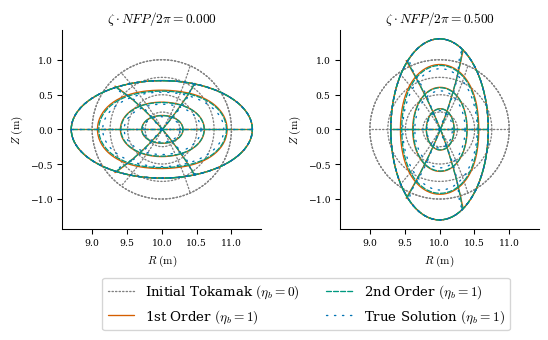

In [32]:
fig, ax = plot_comparison(
    [heq0, heq1, heq2, heqA],
    rho=4,
    theta=6,
    zeta=[0, np.pi / 19],
    colors=["grey", colorblind_colors[1], colorblind_colors[2], colorblind_colors[0]],
    alphas=[0.5, 1, 1, 1],
    linestyles=[":", "-", "--", (0, (1, 5))],
    labels=[
        "Initial Tokamak $(\\eta_b=0)$",
        "1st Order $(\\eta_b=1)$",
        "2nd Order $(\\eta_b=1)$",
        "True Solution $(\\eta_b=1)$",
    ],
    figsize=(6, 3),
    legend=False,
)
fig.dpi = 96
fig.legend(loc="lower center", bbox_to_anchor=(0.55, -0.19), ncol=2)
fig.savefig("heliotron_bdry.png", bbox_inches="tight")
fig.savefig("heliotron_bdry.pdf", bbox_inches="tight")

# W7X

In [33]:
weqf = load("W7X_4step_output.h5")

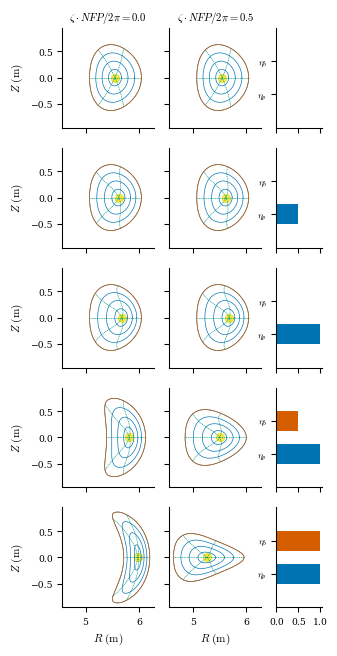

In [34]:
gs = matplotlib.gridspec.GridSpec(5, 3, width_ratios=(1, 1, 0.5))
ax = np.zeros((5, 3), dtype=object)
fig = plt.figure(figsize=(3.5, 8), dpi=96)
for r in range(5):
    for c in range(3):
        if r == 0 and c == 0:
            ax[r, c] = fig.add_subplot(gs[r, c])
        elif c in (0, 1):
            ax[r, c] = fig.add_subplot(gs[r, c], sharex=ax[0, 0], sharey=ax[0, 0])
        elif r == 0 and c == 2:
            ax[r, c] = fig.add_subplot(gs[r, c])
        elif c == 2:
            ax[r, c] = fig.add_subplot(gs[r, c], sharex=ax[0, 2], sharey=ax[0, 2])

plot_surfaces(weqf[-9], rho=4, theta=6, zeta=[0, np.pi], ax=ax[0, :2])
plot_surfaces(weqf[-7], rho=4, theta=6, zeta=[0, np.pi], ax=ax[1, :2])
plot_surfaces(weqf[-5], rho=4, theta=6, zeta=[0, np.pi], ax=ax[2, :2])
plot_surfaces(weqf[-3], rho=4, theta=6, zeta=[0, np.pi], ax=ax[3, :2])
plot_surfaces(weqf[-1], rho=4, theta=6, zeta=[0, np.pi], ax=ax[4, :2])
for k, a in enumerate(ax.flat):
    for line in a.lines:
        line.set_linewidth(0.5)
    row = k // 3
    col = k % 3
    if row != 4:
        a.set_xlabel(None)
    if col == 1:
        a.set_ylabel(None)
    a.tick_params(labelbottom=False, labelleft=False)
    a.set_title("")
    if row == 0 and col < 2:
        a.set_title("$\\zeta \cdot NFP/2\\pi={:.1f}$".format(col / 2), fontsize=8)
    if row == 4:
        a.tick_params(labelbottom=True)
    if col in (0, 2):
        a.tick_params(labelleft=True)

ax[-1, -1].set_xticks([0, 0.5, 1])

ax[0, 2].set_ylim((0, 1.5))
ax[0, 2].barh(
    y=[0.5, 1],
    tick_label=["$\\eta_p$", "$\\eta_b$"],
    width=[0.0, 0.0],
    color=[colorblind_colors[0], colorblind_colors[1]],
    height=0.3,
)
ax[1, 2].barh(
    y=[0.5, 1],
    tick_label=["$\\eta_p$", "$\\eta_b$"],
    width=[0.5, 0.0],
    color=[colorblind_colors[0], colorblind_colors[1]],
    height=0.3,
)
ax[2, 2].barh(
    y=[0.5, 1],
    tick_label=["$\\eta_p$", "$\\eta_b$"],
    width=[1.0, 0.0],
    color=[colorblind_colors[0], colorblind_colors[1]],
    height=0.3,
)
ax[3, 2].barh(
    y=[0.5, 1],
    tick_label=["$\\eta_p$", "$\\eta_b$"],
    width=[1.0, 0.5],
    color=[colorblind_colors[0], colorblind_colors[1]],
    height=0.3,
)
ax[4, 2].barh(
    y=[0.5, 1],
    tick_label=["$\\eta_p$", "$\\eta_b$"],
    width=[1.0, 1.0],
    color=[colorblind_colors[0], colorblind_colors[1]],
    height=0.3,
)
fig.set_tight_layout(False)

fig.savefig("w7x_bdry_scan.png")
fig.savefig("w7x_bdry_scan.pdf")

# Iota perturbations

In [40]:
eq0 = load("DSHAPE_1_output.h5")[-1]
# perturbing a 2nd order polynomial basis for iota
di = np.zeros_like(eq0.i_l)
di[0] = -0.33
di[2] = 0.33

In [36]:
eq1 = eq0.perturb(di=di)
eq1.solve(ftol=1e-2, maxiter=100)
eq2 = eq1.perturb(di=di)
eq2.solve(ftol=1e-2, maxiter=100);

Precomputing transforms
Perturbing i_l
Precomputing Transforms
Factorizing boundary constraint
Computing df
Factoring df
Computing d^2f
Precomputing transforms
Compiling objective function and derivatives
Starting optimization
Optimization terminated successfully.
`ftol` condition satisfied.
         Current function value: 2.454e-05
         Iterations: 14
         Function evaluations: 24
         Jacobian evaluations: 15
Start of solver
Total residual:  7.968e+05  f_rho:  1.234e+03  f_beta:  2.665e+02
End of solver
Total residual:  2.454e-05  f_rho:  4.787e-03  f_beta:  5.114e-03
Perturbing i_l
Computing df
Factoring df
Computing d^2f
Precomputing transforms
Compiling objective function and derivatives
Starting optimization
Optimization terminated successfully.
`ftol` condition satisfied.
         Current function value: 2.713e-02
         Iterations: 12
         Function evaluations: 19
         Jacobian evaluations: 13
Start of solver
Total residual:  8.769e+06  f_rho:  4.001e+03 

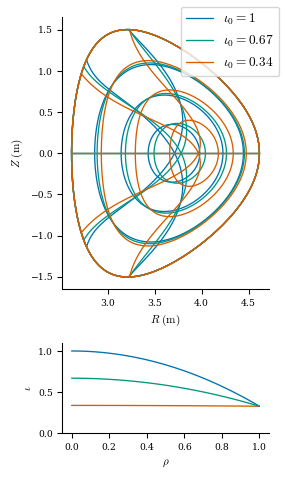

In [37]:
fig, ax = plt.subplots(2, figsize=(3, 5), gridspec_kw={"height_ratios": [3, 1]}, dpi=96)

fig, ax0 = plot_comparison(
    [eq0, eq1, eq2],
    rho=4,
    theta=6,
    colors=[colorblind_colors[0], colorblind_colors[2], colorblind_colors[1]],
    lws=[1],
    labels=["$\\iota_0 = 1$", "$\\iota_0 = 0.67$", "$\\iota_0 = 0.34$"],
    figsize=(3, 3),
    ax=ax[0],
)
ax[0].set_title("")

plot_1d(eq0, "iota", ax=ax[1])
plot_1d(eq2, "iota", ax=ax[1])
plot_1d(eq1, "iota", ax=ax[1])
ax[1].set_ylim([0, 1.1])
fig.savefig("iota_scan_surf.pdf")
fig.savefig("iota_scan_surf.png")